## Using ML and deep learning  methods , we are trying to find credit card frauds

Author: Vishal Raj

In [1]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

In [2]:
data = pd.read_csv('creditcard.csv')

# Data exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Preprocessing

In [4]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount','Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [5]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [6]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [7]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [9]:
X_train.shape

(199364, 29)

In [10]:
X_test.shape

(85443, 29)

In [11]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
X_train

array([[-1.32066260e-01,  1.07043551e-01, -6.50588173e-01, ...,
         3.06394657e-01,  7.48169663e-02, -1.61761045e-01],
       [ 2.12599441e+00,  1.42074055e-02, -1.51476031e+00, ...,
        -6.82673794e-02, -5.76775883e-02, -3.45313182e-01],
       [-8.66939700e-02,  1.66240223e-01,  1.57312700e+00, ...,
        -1.20157065e+00, -1.13993068e+00,  3.26845069e-01],
       ...,
       [ 1.51260229e+00, -9.49435315e-01, -2.19061626e-01, ...,
        -1.41537086e-03,  3.66494418e-03, -2.13696185e-01],
       [ 1.79886333e+00, -1.69979073e+00, -1.42182189e-01, ...,
        -3.36155803e-02, -3.24705125e-02,  3.31682753e-01],
       [-5.89399721e-01,  7.47828393e-01,  1.78478144e+00, ...,
         8.65917860e-02,  1.18083774e-01, -2.89299995e-01]])

# Deep neural network

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [14]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

# Training 

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 7s 552us/step - loss: 0.0101 - accuracy: 0.9983
Epoch 2/5
13291/13291 [==============================] - 8s 572us/step - loss: 0.0040 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 7s 539us/step - loss: 0.0038 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 7s 552us/step - loss: 0.0035 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 8s 629us/step - loss: 0.0033 - accuracy: 0.9994


In [16]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 1s 410us/step - loss: 0.0035 - accuracy: 0.99940s - loss: 0
[0.0035063279792666435, 0.9993562698364258]


In [17]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [18]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

[[85280    16]
 [   39   108]]
Confusion matrix, without normalization
[[85280    16]
 [   39   108]]


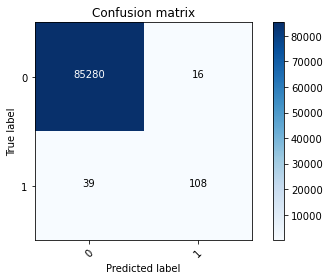

In [19]:
cnf_matrix = confusion_matrix(y_test, y_pred.round())
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[284268     47]
 [   120    372]]


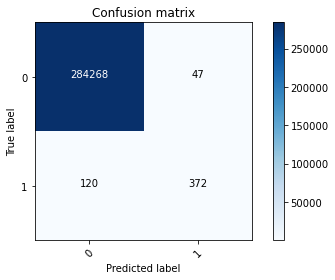

In [20]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

### Undersampling

In [21]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [22]:
normal_indices = data[data.Class == 0].index

In [23]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [24]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [25]:
under_sample_data = data.iloc[under_sample_indices,:]

In [26]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [28]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
46/46 [==============================] - 0s 695us/step - loss: 0.3812 - accuracy: 0.8939
Epoch 2/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1848 - accuracy: 0.9186
Epoch 3/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1647 - accuracy: 0.9317
Epoch 4/5
46/46 [==============================] - 0s 677us/step - loss: 0.1570 - accuracy: 0.9346
Epoch 5/5
46/46 [==============================] - 0s 615us/step - loss: 0.1482 - accuracy: 0.9360


Confusion matrix, without normalization
[[143   0]
 [ 14 139]]


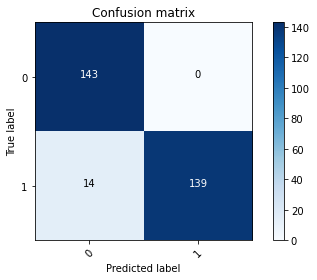

In [31]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[283729    586]
 [    57    435]]


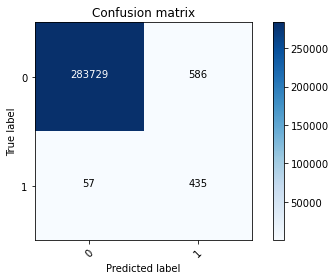

In [32]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

### SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

In [35]:
X_resample, y_resample = SMOTE().fit_resample(X,y.values.ravel())

In [36]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [38]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [39]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
26537/26537 [==============================] - 15s 577us/step - loss: 0.0312 - accuracy: 0.9893
Epoch 2/5
26537/26537 [==============================] - 15s 573us/step - loss: 0.0119 - accuracy: 0.9970
Epoch 3/5
26537/26537 [==============================] - 15s 552us/step - loss: 0.0097 - accuracy: 0.9976
Epoch 4/5
26537/26537 [==============================] - 15s 566us/step - loss: 0.0086 - accuracy: 0.9979
Epoch 5/5
26537/26537 [==============================] - 16s 599us/step - loss: 0.0079 - accuracy: 0.9981


Confusion matrix, without normalization
[[85004   239]
 [    0 85346]]


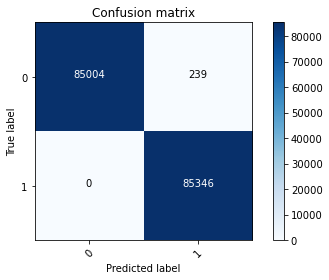

In [40]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

Confusion matrix, without normalization
[[283571    744]
 [     0    492]]


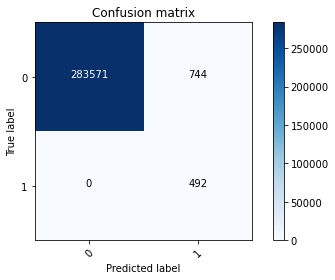

In [41]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

# ML Classifiers

## `1. Random Forest + SMOTE`

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
random_forest = RandomForestClassifier(n_estimators=100)

In [44]:
random_forest.fit(X_train,y_train.ravel())

RandomForestClassifier()

In [45]:
y_pred = random_forest.predict(X_test)
random_forest.score(X_test,y_test)

0.9998534489328151

In [46]:
cnf_matrix = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[85218    25]
 [    0 85346]]


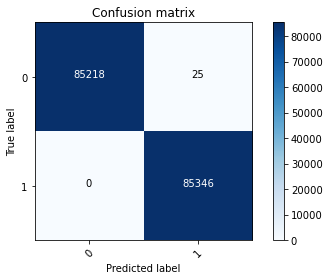

In [47]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [48]:
plt.show()

In [49]:
y_pred = random_forest.predict(X)

In [50]:
cnf_matrix = confusion_matrix(y,y_pred.round())

Confusion matrix, without normalization
[[284290     25]
 [     0    492]]


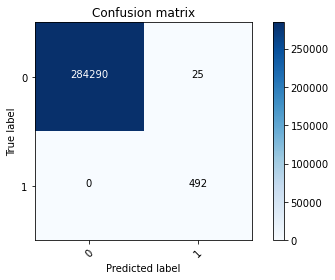

In [51]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

## `2. Decision trees+ SMOTE`

In [53]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [55]:
decision_tree.fit(X_train,y_train.ravel())
decision_tree.score(X_test,y_test)

0.9976786310957917

In [56]:
y_pred = decision_tree.predict(X)
y_expected = pd.DataFrame(y)

Confusion matrix, without normalization
[[284033    282]
 [     1    491]]


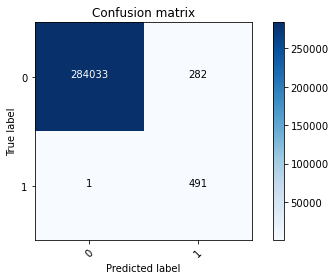

In [57]:
cnf_matrix = confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cnf_matrix,classes=[0,1])
plt.show()

In [58]:
#lets print the classification report
from sklearn.metrics import classification_report

cr=classification_report(y_expected,y_pred)
print(cr)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.64      1.00      0.78       492

    accuracy                           1.00    284807
   macro avg       0.82      1.00      0.89    284807
weighted avg       1.00      1.00      1.00    284807

